In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
colors = ['dodgerblue','salmon','mediumseagreen']

# N=16

In [34]:
K_PT_PIMC = [1.5960045888379566, 1.54947507115796, 1.5114973441872617, 1.4779953000826163, 1.4500695847280929, 1.4141344843249832, 1.3851820634166971, 1.354903714322663, 1.3269512793079887, 1.3055072738504876, 1.2764970901884967, 1.258901540029548, 1.248503554720116, 1.2413523182386694, 1.2361180678662742, 1.2335023882145186, 1.2311458266381654, 1.2298840389926078,1.227433198238352]
K_PT_PIMC_err = [0.00035580316211303266, 0.0003329898567278955, 0.00034188122723691964, 0.00032638556053248474, 0.00033837595030027605, 0.00035201734672860865, 0.0003546192500934129, 0.00035334913695127897, 0.0003754566096056561, 0.00040550281492374873, 0.00042217093905799226, 0.0004532156744642555, 0.0005180271713738149, 0.0004897411776389725, 0.0005199884498706253, 0.0005499219417546537, 0.000606898890670794, 0.0006177650762991326,0.0006837228396847693]
# betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.25,2.50,2.75,3.0,3.25,3.50,3.75,4.0,5.0]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,7.0]

K_PT_exact = 1.226694406837E+00

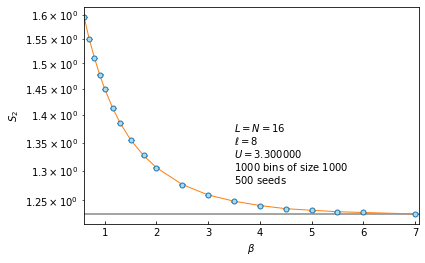

In [35]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,K_PT_PIMC, yerr=K_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,K_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(K_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingKFullU3.3_N16_loglinear.pdf",dpi=400)
plt.savefig("betaScalingKFullU3.3_N16_loglinear.png",dpi=400)
plt.plot();

# RelatiKe Errors Ks $\beta$

In [36]:
# Load PIMC estimates for Karious betas
K_PT_PIMC = np.array(K_PT_PIMC)
K_PT_PIMC_err = np.array(K_PT_PIMC_err)

In [37]:
# Compute relatiKe errors
K_PT_relErr = (np.abs(K_PT_PIMC - K_PT_exact)/K_PT_exact)

In [38]:
# Compute the error propagation
K_PT_PIMC_err_err = K_PT_PIMC_err / K_PT_exact

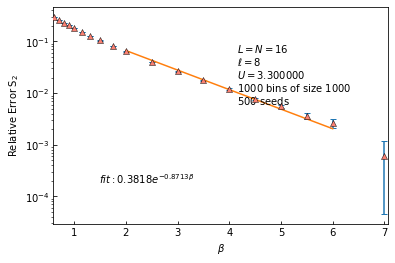

In [39]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],K_PT_relErr[:], yerr=K_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],K_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{RelatiKe} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) Ks x:
m,lnB = np.polyfit(betas[9:],np.log(K_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relatiKeErrorsKFull_N16_loglinear.pdf",dpi=400)
plt.savefig("relatiKeErrorsKFull_N16_loglinear.png",dpi=400)
plt.show()

### Perform exponential fit

In [9]:
betas[9]

2.0

# N=8

In [23]:
K_PT_PIMC = [-14.825446644999952, -14.656355999999505, -14.519178149999997, -14.407991625556146, -14.316134507000001, -14.206648538261215, -14.123622312308427, -14.042099783333331, -13.971153298285605, -13.9233862065, -13.868099411222445, -13.842562315666665, -13.830177508571419, -13.823579933500001, -13.820555615999933, -13.8192279848, -13.818077260727266, -13.817737819333333]
K_PT_PIMC_err = [0.00046574128263647785, 0.0004248181663840309, 0.00038839802327396845, 0.0004086750515306114, 0.00036401730728483615, 0.0003710365126963237, 0.0003269341330040217, 0.00032371859012540413, 0.00031293552197167907, 0.0002863089450584235, 0.00028686679719136976, 0.0002871496297401905, 0.0002894073066165441, 0.0002879603837889953, 0.00027216148259915816, 0.00027566988988124555, 0.00025256631957612784, 0.00023954501294988915]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

K_PT_exact = -13.817614029746316

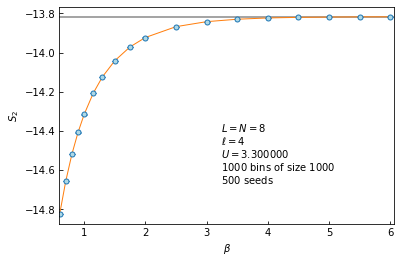

In [24]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,K_PT_PIMC, yerr=K_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,K_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(K_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
# ax1.set_yscale("log")
plt.savefig("betaScalingKU3.3_N8_loglinear.pdf",dpi=400)
plt.savefig("betaScalingKU3.3_N8_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [28]:
# Load PIMC estimates for Karious betas
K_PT_PIMC = np.array(K_PT_PIMC)
K_PT_PIMC_err = np.array(K_PT_PIMC_err)

In [29]:
# Compute relatiKe errors
K_PT_relErr = np.abs((K_PT_PIMC - K_PT_exact)/K_PT_exact)

In [30]:
# Compute the error propagation
K_PT_PIMC_err_err = np.abs(K_PT_PIMC_err / K_PT_exact)

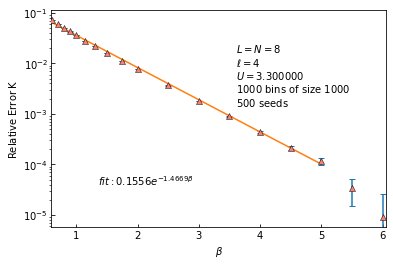

In [33]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],K_PT_relErr[:], yerr=K_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],K_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; K$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) Ks x:
m,lnB = np.polyfit(betas[:16],np.log(K_PT_relErr)[:16],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[15],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsKFull_N8_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsKFull_N8_loglinear.png",dpi=400)
plt.show()

In [34]:
betas[15]

5.0

# N=4

In [85]:
K_PT_PIMC = [-7.411475295000061, -7.325326452856991, -7.259272776249998, -7.20700945222185, -7.16657682, -7.122619200000483, -7.093031253846255, -7.0679361540000265, -7.050690811428519, -7.041153705500001, -7.03432806, -7.032495560666664, -7.032087160285663, -7.03211959675, -7.032230079111209, -7.0322874482, -7.032854164181895, -7.032001529726119]
K_PT_PIMC_err = [0.00038912529812362083, 0.00039736529895944244, 0.0003393234210466618, 0.0003261609579942047, 0.0003013928156628828, 0.00032609495207036913, 0.000301412914898525, 0.00026546669388771536, 0.00028622765977969074, 0.00027567629766864096, 0.0002524004196272263, 0.00025178803818286043, 0.00024781052460522173, 0.000249777121720227, 0.0002513607118099627, 0.00024024818090590016, 0.0002433119562053279, 0.00024028951639476509]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
K_PT_exact = -7.03215261368084

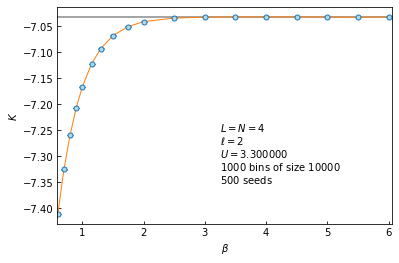

In [87]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,K_PT_PIMC, yerr=K_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,K_PT_PIMC,lw=1)
ax1.set_ylabel(r'$K$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(K_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
# ax1.set_yscale("log")
plt.savefig("betaScalingKU3.3_N4.pdf",dpi=400)
plt.savefig("betaScalingKU3.3_N4.png",dpi=400)
plt.plot();

# RelatiKe Errors Ks $\beta$

In [88]:
# Load PIMC estimates for Karious betas
K_PT_PIMC = np.array(K_PT_PIMC)
K_PT_PIMC_err = np.array(K_PT_PIMC_err)

In [89]:
# Compute relatiKe errors
K_PT_relErr = (np.abs(-K_PT_PIMC - -K_PT_exact)/-K_PT_exact)

In [90]:
# Compute the error propagation
K_PT_PIMC_err_err = K_PT_PIMC_err / K_PT_exact

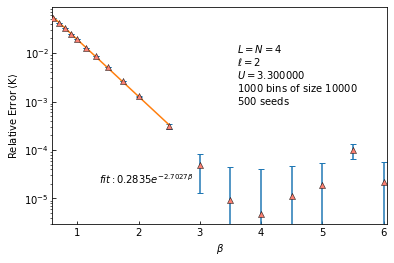

In [91]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],K_PT_relErr[:], yerr=K_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],K_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{RelatiKe} \; \rm{Error} \; \langle K \rangle$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) Ks x:
m,lnB = np.polyfit(betas[0:11],np.log(K_PT_relErr)[0:11],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[10],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relatiKeErrorsK_N4_loglinear.pdf",dpi=400)
plt.savefig("relatiKeErrorsK_N4_loglinear.png",dpi=400)
plt.show()

In [84]:
betas[9:]

[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]